In [1]:
pip install mealpy==2.5.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mafese==0.1.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mafese as mfse

2024-03-04 20:48:48.561226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 20:48:48.561347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 20:48:48.723882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# loading the images
train_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train"
test_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test"

# generator
def datagen(func):
  train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
              preprocessing_function=func,
              horizontal_flip = True,
              vertical_flip = True,
              rotation_range = 0.5,
              width_shift_range = 0.25,
              height_shift_range = 0.25,
              shear_range = 0.2,
              zoom_range = 0.4,
              validation_split = 0.92)

  test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
              preprocessing_function=func,
              validation_split = 0.8)

  test_gen_2 = tf.keras.preprocessing.image.ImageDataGenerator(
              preprocessing_function=func,
              validation_split = 0.2)

  pred_gen = tf.keras.preprocessing.image.ImageDataGenerator(
              preprocessing_function=func,
              validation_split = 0.92)

  train_set = train_gen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 128, target_size = (224,224), shuffle = True, subset = 'training')
  test_set = test_gen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 128, target_size = (224,224), shuffle = False, subset='training')
  val_set = test_gen_2.flow_from_directory(test_dir, class_mode = "binary", batch_size = 128, target_size = (224,224), shuffle = False, subset='validation')
  pred_tr_set = pred_gen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 128, target_size = (224,224), shuffle = False, subset = 'training')
  return train_set, test_set, val_set, pred_tr_set

In [5]:
import shutil 

src_path = r"/kaggle/input/mhr-project/resnet152_final_2.keras"
dst_path = r"/kaggle/working/"
shutil.copy(src_path, dst_path)

'/kaggle/working/resnet152_final_2.keras'

In [6]:
model = tf.keras.models.load_model("/kaggle/working/resnet152_final_2.keras")
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 1030 variables whereas the saved optimizer has 124 variables. 



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,719,752 (666.50 MB)

 Trainable params: 58,192,002 (221.98 MB)

 Non-trainable params: 143,744 (561.50 KB)

 Optimizer params: 116,384,006 (443.97 MB)

In [7]:
tr_set, te_set, v_set, pr_set = datagen(tf.keras.applications.resnet_v2.preprocess_input)

Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [8]:
model.evaluate(te_set)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

I0000 00:00:1709585536.684387      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-04 20:52:16.700728: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


32/32 ━━━━━━━━━━━━━━━━━━━━ 777s 24s/step - accuracy: 0.9435 - loss: 0.1392


[0.14684484899044037, 0.9417499899864197]

In [9]:
# getting feature outputs

pooling_model = tf.keras.Model(model.inputs, model.layers[-2].output)
train_features = pooling_model.predict(pr_set)
train_labels = pr_set.labels
test_features = pooling_model.predict(te_set)
test_labels = te_set.labels
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 1740s 28s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 889s 28s/step


((8000, 2048), (8000,), (4000, 2048), (4000,))

In [10]:
# testing and comparing algorithms
from mafese.wrapper.mha import MhaSelector
from sklearn.neighbors import KNeighborsClassifier

algos = ['OriginalGWO', 'RW_GWO', 'GWO_WOA', 'OriginalPSO', 'HPSO_TVAC', 'OriginalHS', 'HI_WOA', 'OriginalWOA', 'OriginalEFO', 'BaseGA', 
        'EliteMultiGA', 'MultiGA', 'OriginalCRO']
scores = []
num_feat = []

for i in range(len(algos)):
  feat_selector = MhaSelector(problem="classification", estimator="knn", optimizer=algos[i], transfer_func="vstf_01")
  feat_selector.fit(train_features, train_labels, verbose=False)
  test_features_transform = feat_selector.transform(test_features)
  KNN = KNeighborsClassifier()
  KNN.fit(test_features_transform, test_labels)
  scores.append(KNN.score(test_features_transform, test_labels))
  num_feat.append(len(feat_selector.selected_feature_indexes))

In [11]:
scores

[0.9105,
 0.906,
 0.90975,
 0.913,
 0.9125,
 0.92025,
 0.8975,
 0.90375,
 0.908,
 0.90375,
 0.89575,
 0.906,
 0.9205]

In [12]:
num_feat

[209, 274, 229, 812, 279, 1901, 207, 273, 274, 205, 340, 318, 619]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



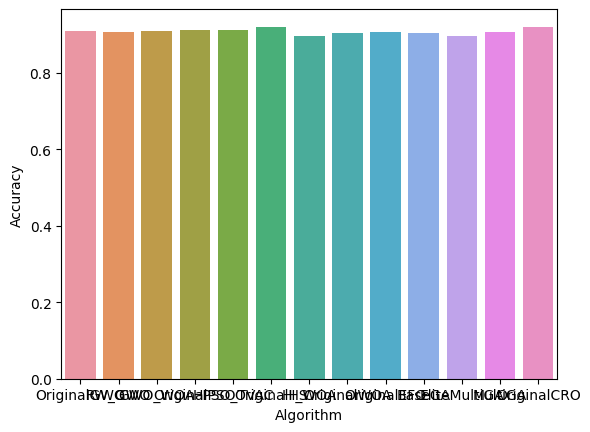

In [13]:
# scores chart

bplot = sns.barplot(x=algos, y=scores)
bplot.set(xlabel='Algorithm', ylabel='Accuracy')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



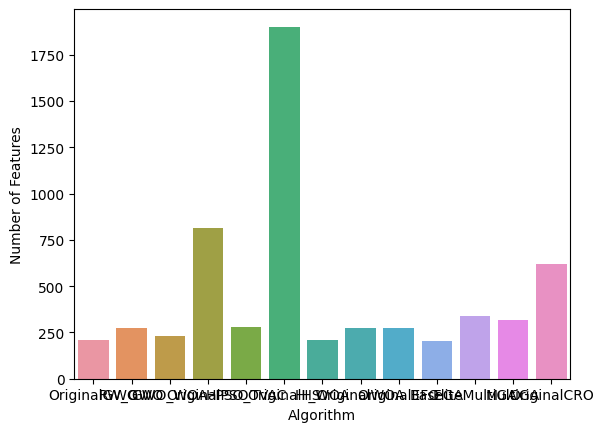

In [14]:
# n_feat chart

bplot = sns.barplot(x=algos, y=num_feat)
bplot.set(xlabel='Algorithm', ylabel='Number of Features')
plt.show()